In [1]:
election<- read.csv("../Data//election_2022.csv")
head(election)
tail(election)
str(election)
summary(election)
sum(is.na(election))

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  

[1] 0

In [2]:
library(plotrix)
library(dplyr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
votesum <- aggregate(투표수~광역시도,election,sum)
votesum
total <- sum(votesum[,2])
total
voteratio <- data.frame(광역시도=votesum$광역시도,투표율=round(votesum$투표수/total*100,2))
voteratio <-arrange(voteratio,desc(투표율))
voteratio



광역시도,투표수
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831
세종특별자치시,231832


[1] 33764664

광역시도,투표율
경기도,25.23
서울특별시,19.26
부산광역시,6.52
경상남도,6.36
인천광역시,5.58
경상북도,5.25
대구광역시,4.77
충청남도,3.92
전라남도,3.80
전라북도,3.66


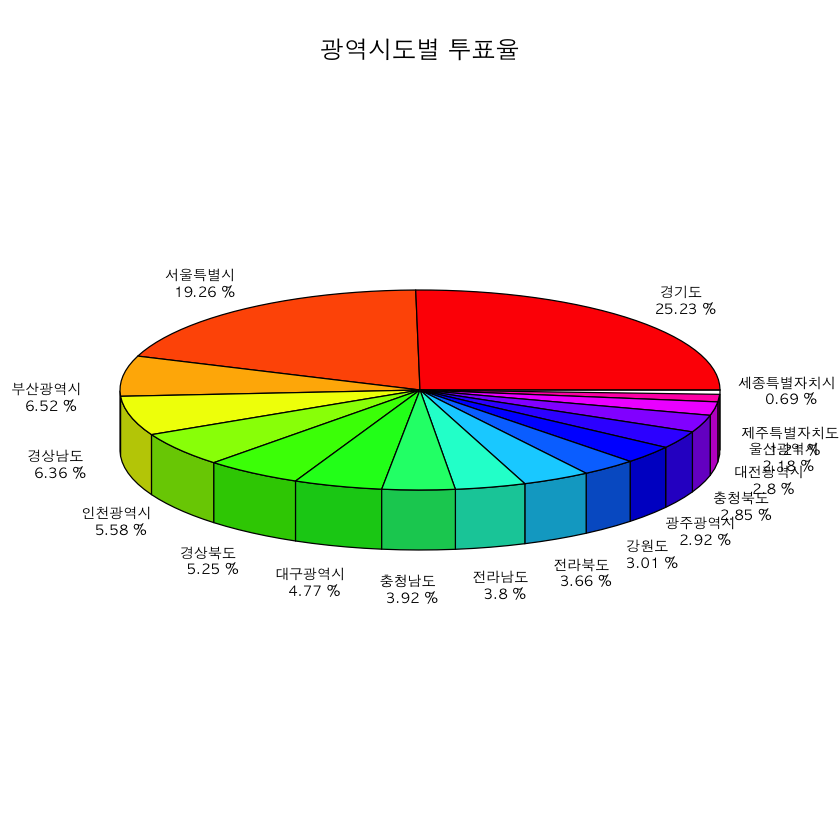

In [4]:
par(family ="AppleGothic")
options(warn = -1)
label <- paste(voteratio$광역시도,"\n",voteratio$투표율,"%")
pie3D(voteratio$투표율,  #3D라고 적어주기 
   main ="광역시도별 투표율",
    labels = label,  #기본값이 레인보우여서 색지정하지 않아도 됨
      labelcex=0.7
   )

In [5]:
# electionSum = 이재명 + 윤석열 + 심상정

election$electionSum <- apply(election[,5:7],1,sum)
head(election)


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [6]:
# electionRation <- 투표수 대비 electionSum 의 퍼센트 구해서 넣기

election$electionRatio <- election$electionSum/election$투표수*100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [7]:
# 3명의 후보를 가장 많이 선택한 지역/Volumes/Data/Data/election_2022_job1.csv과 가장 적게 선택한 지역 구하기

#1) 정렬을 통해 구하기 
library(dplyr)
arrange(election,desc(electionRatio))[1,]

arrange(election,electionRatio)[1,]
arrange(election,desc(electionRatio))[nrow(election),]

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [8]:
# 2)subset 
subset(election,electionRatio==max(election$electionRatio))
subset(election,electionRatio==min(election$electionRatio))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [9]:
# election_2022_job1.csv로 저장하기
write.csv(election,"../Data/election_2022_job1.csv",row.names=F)

---

In [10]:
# 각 후보 (윤석열, 이재명, 심상정)의 광역시도별 득표율을 3D Pie Chart로 표현하기 
#(단, 득표율이 3% 미만인 광역시도는 광역시도명만 출력고 퍼센트는 출력하지 않는다,/ 퍼센트 단위는 소수 한자리 )


voteyoon <-aggregate(윤석열~광역시도,election,sum)

yoon <-data.frame(광역시도=votesum$광역시도,윤득표율=round(voteyoon$윤석열/sum(voteyoon$윤석열)*100,1))
yoon <-arrange(yoon, desc(윤득표율))
yoon

광역시도,윤득표율
경기도,23.7
서울특별시,20.0
경상북도,7.9
부산광역시,7.8
경상남도,7.6
대구광역시,7.4
인천광역시,5.4
충청남도,4.1
강원도,3.4
충청북도,3.0


In [11]:
library(plotrix)

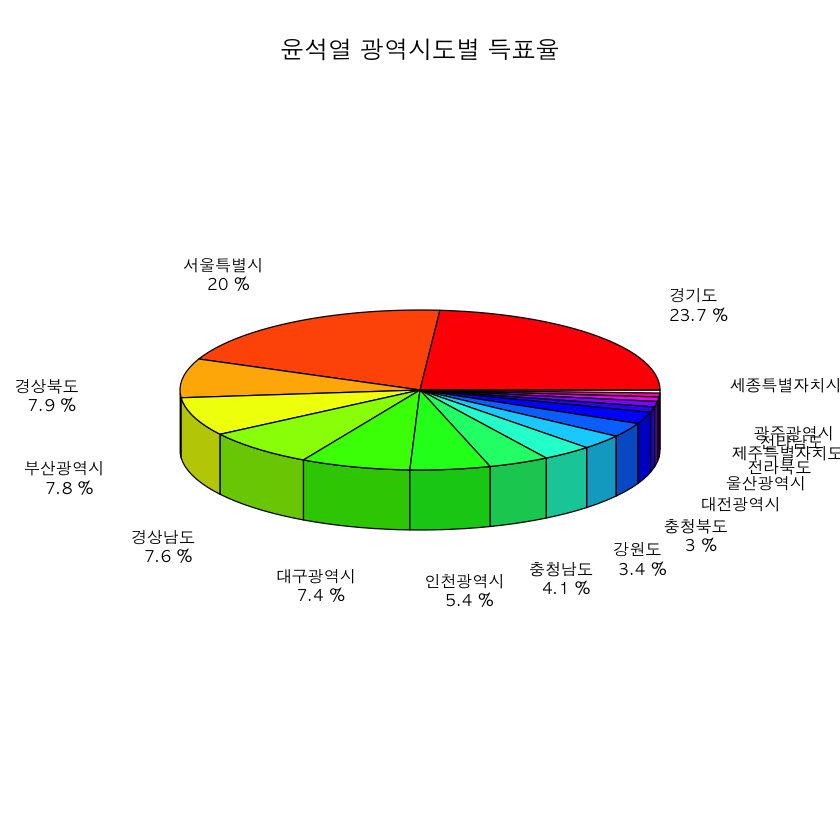

In [12]:
par(family ="AppleGothic")
label <- ifelse(yoon$윤득표율<3,paste(yoon$광역시도),paste(yoon$광역시도,"\n",yoon$윤득표율,"%"))
pie3D(yoon$윤득표율,  #3D라고 적어주기 
   main ="윤석열 광역시도별 득표율",
    labels = label,  #기본값이 레인보우여서 색지정하지 않아도 됨
      labelcex=0.8,
      radius=0.8
   )

In [13]:
# 수도권(경기도, 서울, 인천) 의 투표인구수의 퍼센트?
votesum 
votesum
round(sum(votesum[c(1:2,5),2])/sum(votesum$투표수)*100,2)


광역시도,투표수
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831
세종특별자치시,231832


광역시도,투표수
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831
세종특별자치시,231832


[1] 31.16

---
### 윤석열 후보의 서울 득표 top5 구하고 나머지 지역은 기타로 합치기 

In [14]:
# 서울 특별시 데이터마 발췌

#subset(election,광역시도=='서울특별시')
#다른방법
election_Seoul <- election[election$광역시도=='서울특별시',]
election_seoul_윤석열 <- arrange(election_Seoul,desc(윤석열))[,c(2,6)]
election_seoul_윤석열

시군구,윤석열
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593
관악구,151944
양천구,149780
은평구,140666
동작구,135733


In [15]:
# ratio 구하기
election_seoul_윤석열_ratio <-
round(c(election_seoul_윤석열[1:5,2],sum(election_seoul_윤석열[-c(1:5),2]))/sum(election_seoul_윤석열$윤석열)*100,2)

election_seoul_윤석열_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [16]:
# label 만들기
election_Seoul_윤석열_label <- c(as.character(election_seoul_윤석열$시군구[1:5]),'기타')
election_Seoul_윤석열_label

[1] "송파구" "강남구" "강서구" "서초구" "노원구" "기타"

In [17]:
# 대선주자 출생지별 득표율 분석
#- 윤석열 후보의 출생지는 서울특별시 성북구
election_성북구 <- subset(election,시군구=='성북구')
election_성북구


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141


In [18]:
# ratio 구하기
윤석열_성북구<-election_성북구[,5:7]/election_성북구$투표수*100
성북구_data <- as.numeric(c(윤석열_성북구,기타=100-sum(election_성북구[,5:7]/election_성북구$투표수*100)))
성북구_dataall<- data.frame(사람=c('이재명','윤석열','심상정','기타'), 득표율=성북구_data)
성북구_dataall

사람,득표율
이재명,48.839271
윤석열,46.218346
심상정,3.063791
기타,1.878591


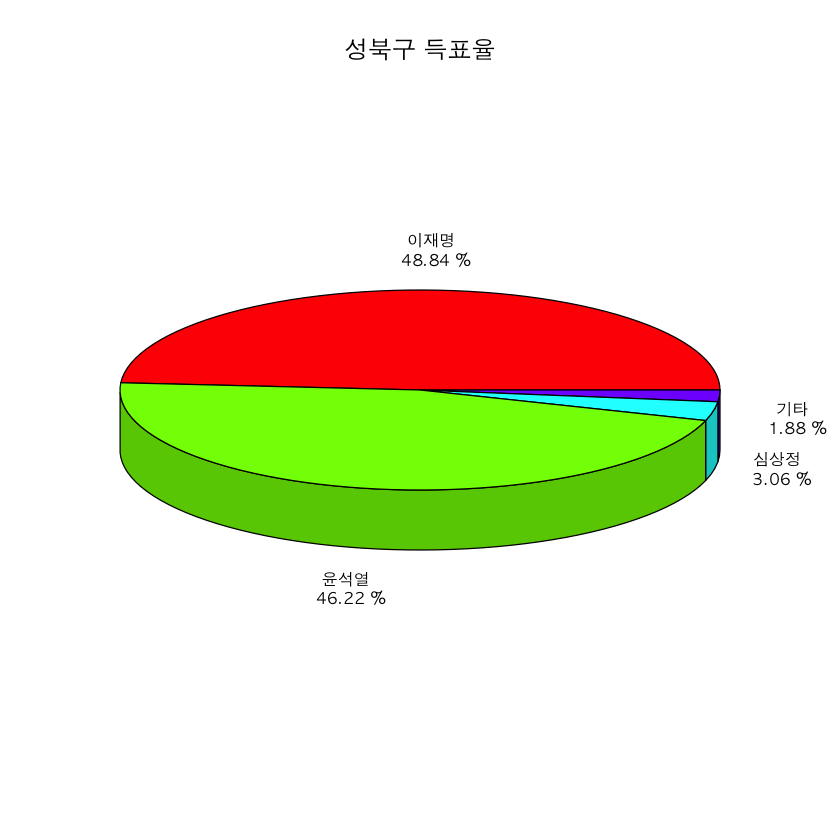

In [19]:
library(plotrix)
par(family ="AppleGothic")
label <- paste(성북구_dataall$사람,"\n",round(성북구_dataall$득표율,2),"%")
pie3D(성북구_dataall$득표율,
      main ="성북구 득표율",
    labels = label,  #기본값이 레인보우여서 색지정하지 않아도 됨
      labelcex=0.8,
   
      )

---
# 투표수가 가장 많은 4지역(광역시도) 의 후보별 득표수 차이를 막대그래프로 시각화

In [50]:
votelee <- aggregate(이재명~광역시도,election,sum)
votelee
voteyoon <- aggregate(윤석열~광역시도,election,sum)
voteshim <- aggregate(심상정~광역시도,election,sum)

voteall <-data.frame(광역시도=votelee$광역시도, 이재명=votelee$이재명, 윤석열=voteyoon$윤석열,
                     심상정=voteshim$심상정,
                     합계=as.numeric(votelee$이재명+voteyoon$윤석열+voteshim$심상정))
voteall4 <- t(arrange(voteall,desc(합계))[1:4,2:4])
colnames(voteall4)<-c("경기도","서울특별시","부산광역시","경상남도")
str(voteall4)
voteall4 


광역시도,이재명
강원도,419644
경기도,4297931
경상남도,794130
경상북도,418371
광주광역시,830058
대구광역시,345045
대전광역시,434950
부산광역시,831896
서울특별시,2944981
세종특별자치시,119349


 int [1:3, 1:4] 4297931 3859666 201113 2944981 3255747 180324 831896 1270072 47541 794130 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:3] "이재명" "윤석열" "심상정"
  ..$ : chr [1:4] "경기도" "서울특별시" "부산광역시" "경상남도"


,경기도,서울특별시,부산광역시,경상남도
이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


In [59]:
# 동원오빠가 한거!!!
t(as.matrix(arrange(aggregate(cbind(투표수, 이재명, 윤석열, 심상정)~광역시도, election, sum), desc(투표수))[1:4,c(1,3:5)]))


,1,2,3,4
광역시도,경기도,서울특별시,부산광역시,경상남도
이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


In [68]:
t(as.matrix(arrange(aggregate(cbind(투표수,이재명,윤석열,심상정)~광역시도, election, sum),desc(투표수))[1:4,c(1,3,4,5)]))[2:4,]

,1,2,3,4
이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


In [60]:
options(scipen = 100)

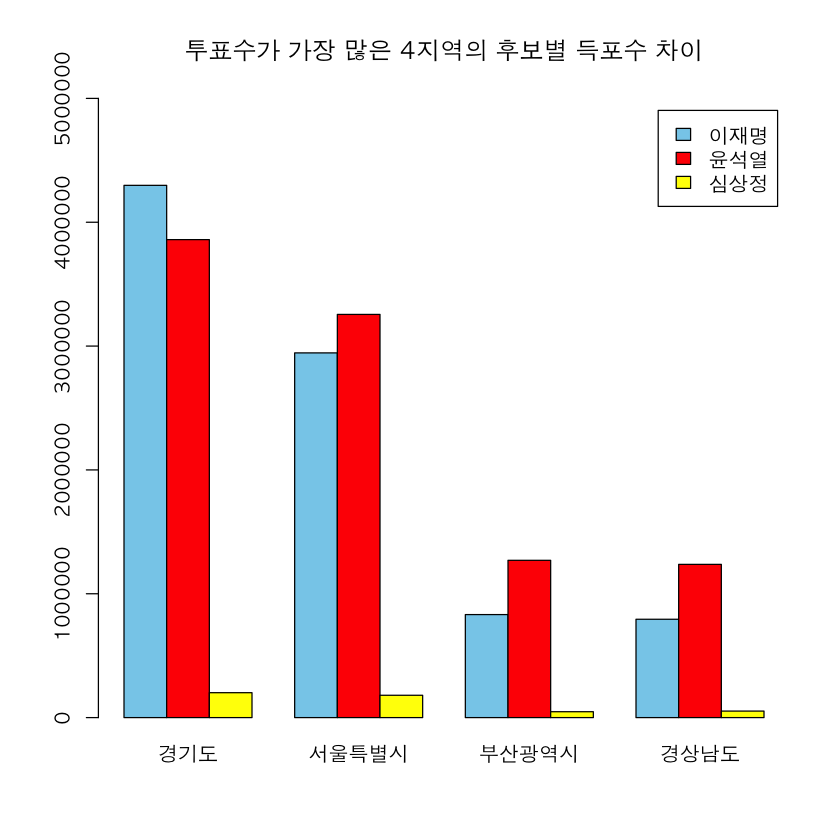

In [49]:
options(warn = -1)
par(family = "AppleGothic")
barplot(voteall4,
beside=T,
        ylim=c(0,5000000),
        col=c("skyblue","red","yellow"),
        main="투표수가 가장 많은 4지역의 후보별 득포수 차이",
        legend.text = T
        
    
)

---
# 투표수가 높은 시군구의 후보별 득표수를 막대그래프로 시각화

In [97]:
name<-arrange(election[,c(1,2,4:7)],desc(투표수))[1:5,]
name
vote<-t(as.matrix(arrange(election[,c(1,2,4:7)],desc(투표수))[1:5,4:6]))
vote




광역시도,시군구,투표수,이재명,윤석열,심상정
경기도,화성시,542027,283324,236055,12955
경기도,부천시,532995,285227,224331,13249
경기도,남양주시,460518,239179,203075,10089
서울특별시,송파구,453536,180490,255166,10652
서울특별시,강서구,390247,190000,181510,11100


,1,2,3,4,5
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


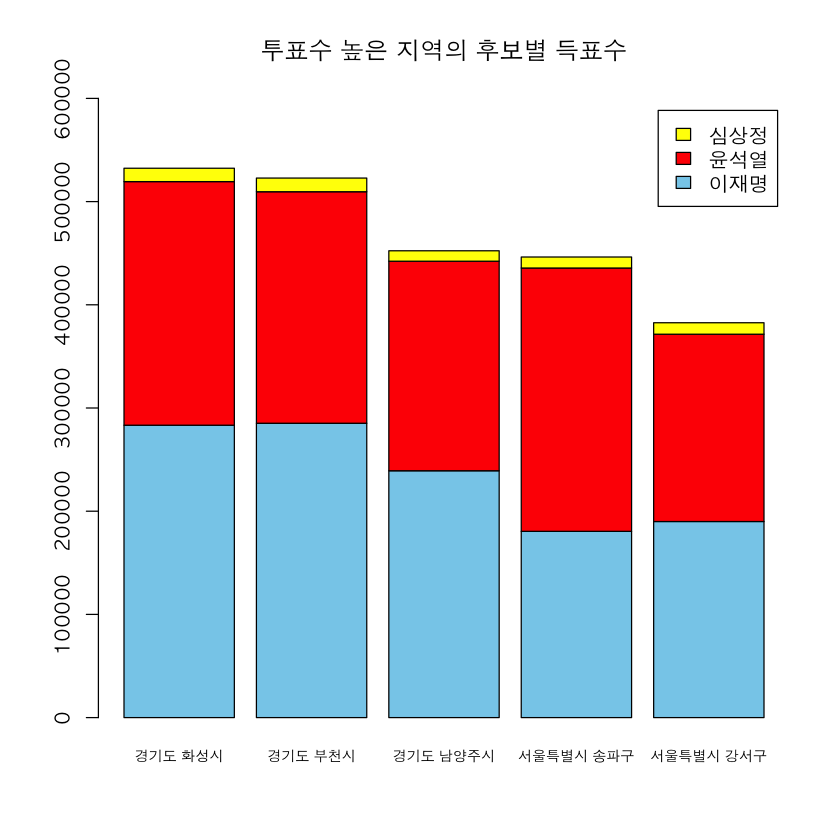

In [110]:
options(warn = -1)
par(family = "AppleGothic")
barplot(vote,

        ylim=c(0,600000),
        col=c("skyblue","red","yellow"),
        main="투표수 높은 지역의 후보별 득표수",
        legend.text = T,
        names=paste(name$광역시도,name$시군구),
        cex.names=0.7,
        
)

In [228]:
library(dplyr)
ratio <-data.frame(광역시도=election$광역시도,시군구=election$시군구,투표율=election$투표수/election$선거인수*100,
이재명=election$이재명/election$투표수*100,
윤석열=election$윤석열/election$투표수*100,
심상정=election$심상정/election$투표수*100)
ratio <-arrange(ratio,desc(투표율))

#지역별 75넘는곳
지역75<- subset(ratio,투표율>=75)


#이재명 50 넘는곳
이재명50<- subset(ratio,투표율>=75&이재명>50)


#윤석열 50 넘는곳
윤석열50 <- subset(ratio,투표율>=75&윤석열>50)


merge1 <-merge(x=count(지역75,광역시도),y=count(이재명50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)

merge2<-merge(x=merge1,y=count(윤석열50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)
colnames(merge2) <- c('광역시도','지역별75','이재명50','윤석열50')
merge2[is.na(merge2)] <-0
merge2

광역시도,지역별75,이재명50,윤석열50
강원도,14,0,14
경기도,26,12,6
경상남도,18,0,18
경상북도,22,0,22
광주광역시,5,5,0
대구광역시,8,0,8
대전광역시,4,0,1
부산광역시,8,0,8
서울특별시,24,2,8
세종특별자치시,1,1,0


In [229]:
team<- t(as.matrix(merge2[,2:4]))
team

지역별75,14,26,18,22,5,8,4,8,24,1,5,4,22,15,8,8
이재명50,0,12,0,0,5,0,0,0,2,1,0,0,22,15,0,0
윤석열50,14,6,18,22,0,8,1,8,8,0,3,3,0,0,8,7


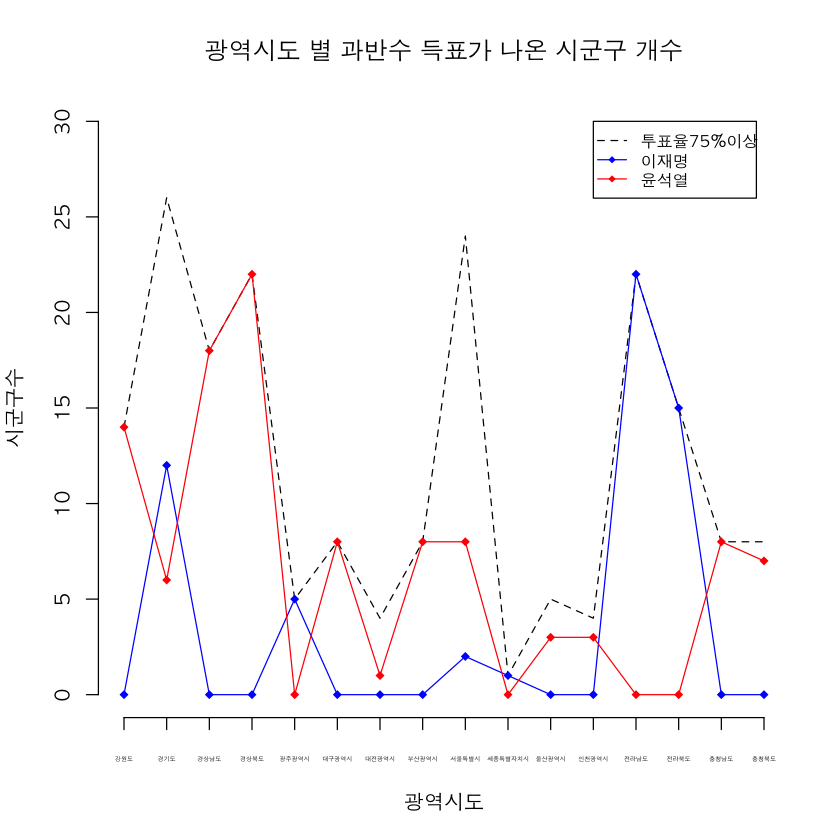

In [230]:
par(family ="AppleGothic", bg='white')
options(warn = -1)
plot(team[1,],
    type='l',
     ylim=c(0,30),
     col='black',
     axes =F, #x,y 좌표 frame 제거
     ann=F, #x,y label 제거
     lty = 2,

    )
# x축과 x축의 라벨을 설정
axis(1, at=1:16, lab=merge2$광역시도,cex.axis=0.3)
# y축과 y축의 라벨을 설정
axis(2, ylim=c(0,30))
# main title 지정
title(main="광역시도 별 과반수 득표가 나온 시군구 개수",col.main="black")

# x축 title(label) 지정
title(xlab="광역시도", col.lab="black")

# y축 title(label) 지정
title(ylab="시군구수", col.lab="black")
lines(team[2,],
      type='o',
       pch=18,
      lty=1,
     col="blue")

lines(team[3,],
      type='o',
       pch=18,
      lty=1,
     col="red")
# 범례
legend(12,30, #x,y 좌표값 (왼쪽위에 해당하는점)
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8  #기본 값이 1 
       
      )

In [270]:
광역시 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~광역시도,election,sum)

# 투표율 최고, 최저 지역의 득표율

문제 <- 광역시
문제
문제$투표율 <- 문제$투표수 / 문제$선거인수
문제 <- arrange(문제, desc(투표율))
최고 <- 문제[1,]
최고
최저 <- 문제[length(문제$광역시도),]
최저
득 <- rbind(최고, 최저)[,3:6]
득$이재명 = 득$이재명/득$투표수*100
득$윤석열 = 득$윤석열/득$투표수*100
득$심상정 = 득$심상정/득$투표수*100
결과 <-득[,2:4]
결과$기타 <-100-(결과$이재명+결과$윤석열+결과$심상정)
결과 <- t(as.matrix(결과))
결과
colnames(결과)<-c("최고 :광주광역시","최저 :제주특별자치도")
결과

광역시도,선거인수,투표수,이재명,윤석열,심상정
강원도,1333621,1015458,419644,544980,25031
경기도,11106036,8518854,4297931,3859666,201113
경상남도,2809907,2146882,794130,1237346,52591
경상북도,2273028,1774284,418371,1278922,33123
광주광역시,1209206,985492,830058,124511,14865
대구광역시,2046714,1611512,345045,1199888,31131
대전광역시,1233177,945308,434950,464060,25445
부산광역시,2921510,2200224,831896,1270072,47541
서울특별시,8346647,6501831,2944981,3255747,180324
세종특별자치시,288895,231832,119349,101491,6780


광역시도,선거인수,투표수,이재명,윤석열,심상정,투표율
광주광역시,1209206,985492,830058,124511,14865,0.814991


,광역시도,선거인수,투표수,이재명,윤석열,심상정,투표율
17,제주특별자치도,564354,409649,213130,173014,13598,0.7258724


,1,17
이재명,84.227777,52.027467
윤석열,12.634400,42.234694
심상정,1.508384,3.319427
기타,1.629440,2.418412


,최고 :광주광역시,최저 :제주특별자치도
이재명,84.227777,52.027467
윤석열,12.634400,42.234694
심상정,1.508384,3.319427
기타,1.629440,2.418412


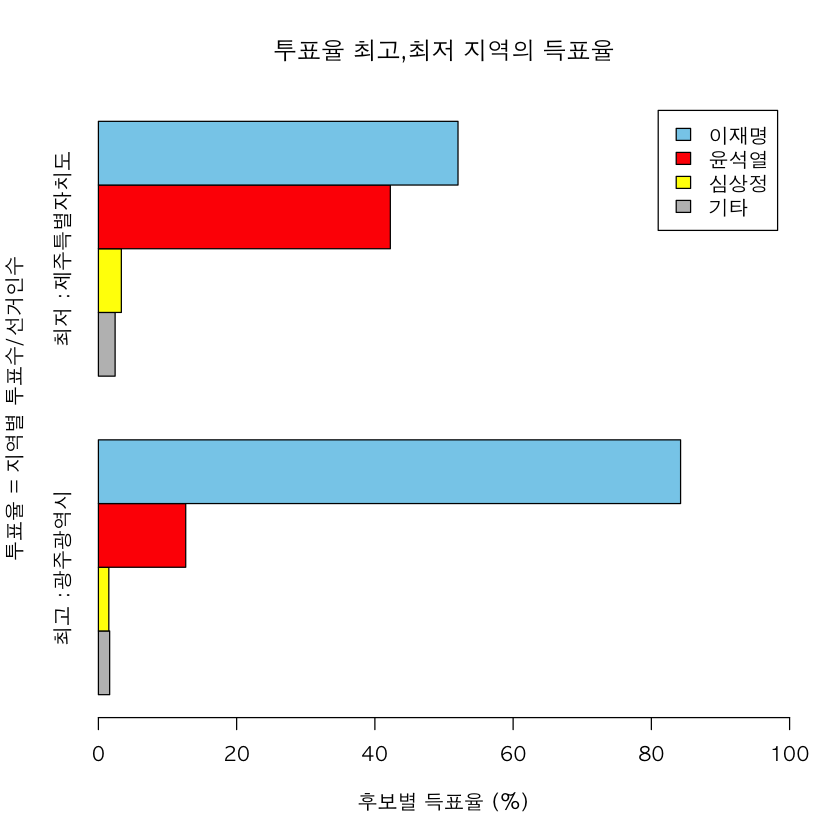

In [269]:
par(family ="AppleGothic")
barplot(결과[c(4,3,2,1),],
        main="투표율 최고,최저 지역의 득표율",
     
         xlab="후보별 득표율 (%)",
        ylab="투표율 = 지역별 투표수/선거인수",
        beside=T,
        horiz=T,  #막대그래프 가로로 나오게 하기 
       xlim=c(0,100),
        col=c("grey","yellow","red","skyblue"),
         legend.text = T
        )

In [287]:
par(family = 'AppleGothic', bg = '#fafafa')
광<- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~광역시도,election,sum)
광$권역 <- c('강원권', '수도권', '영남권', '영남권', '호남권', '영남권', '충청권', '영남권', '수도권', '충청권', '영남권', '수도권', '호남권', '호남권','호남권','충청권','충청권')
광 <- aggregate(cbind(투표수, 이재명, 윤석열, 심상정)~권역, 광, sum)
광
광$이재명후보<- 광$이재명/광$투표수
광$윤석열후보 <- 광$윤석열/광$투표수
광$심상정후보 <- 광$심상정/광$투표수
광<-광[c(1,6,7,8)]
datas<-t(as.matrix(광))
datas

권역,투표수,이재명,윤석열,심상정
강원권,1015458,419644,544980,25031
수도권,16904189,8156232,7993973,433289
영남권,8468363,2686576,5382549,185678
충청권,3464133,1573443,1719055,89261
호남권,3912521,3154923,619883,64193


권역,강원권,수도권,영남권,충청권,호남권
이재명후보,0.4132559,0.4824977,0.3172486,0.4542098,0.8063658
윤석열후보,0.5366839,0.4728989,0.6356068,0.4962439,0.1584357
심상정후보,0.02464996,0.02563205,0.02192608,0.02576720,0.01640707


In [331]:
a<- subset(election,,c(1,2,3,4,5,6,7))
a$투표율 <- a$투표수/a$선거인수*100
a$이오차<-abs(a$이재명/a$투표수*100-47.83)
a$윤오차<-abs(a$윤석열/a$투표수*100-48.56)
a$심오차<-abs(a$심상정/a$투표수*100-2.37)

a<- subset(a,이오차<=1 & 윤오차<=1 &심오차<=1& 윤석열>이재명 & 윤석열>심상정 & 이재명>심상정)
a$오차의합 <-a$이오차+a$윤오차+a$심오차
a<-arrange(a,오차의합)
a
dataset<-t(as.matrix(a[,12]))
dataset

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,이오차,윤오차,심오차,오차의합
대전광역시,유성구,288686,231027,108701,111342,6492,80.02709,0.7787895,0.3656331,0.4400612,1.584484
인천광역시,미추홀구,356862,253347,119287,121122,6951,70.99299,0.7455664,0.7512634,0.3736678,1.870498
인천광역시,동구,53909,40918,19195,19661,1196,75.90198,0.9191050,0.5102419,0.5529190,1.982266
대전광역시,대덕구,152905,115404,54119,55159,3141,75.47431,0.9347451,0.7635631,0.3517427,2.050051
충청북도,청주시흥덕구,223335,163683,76940,77952,4770,73.29035,0.8245077,0.9362394,0.5441695,2.304917


1.584484,1.870498,1.982266,2.050051,2.304917


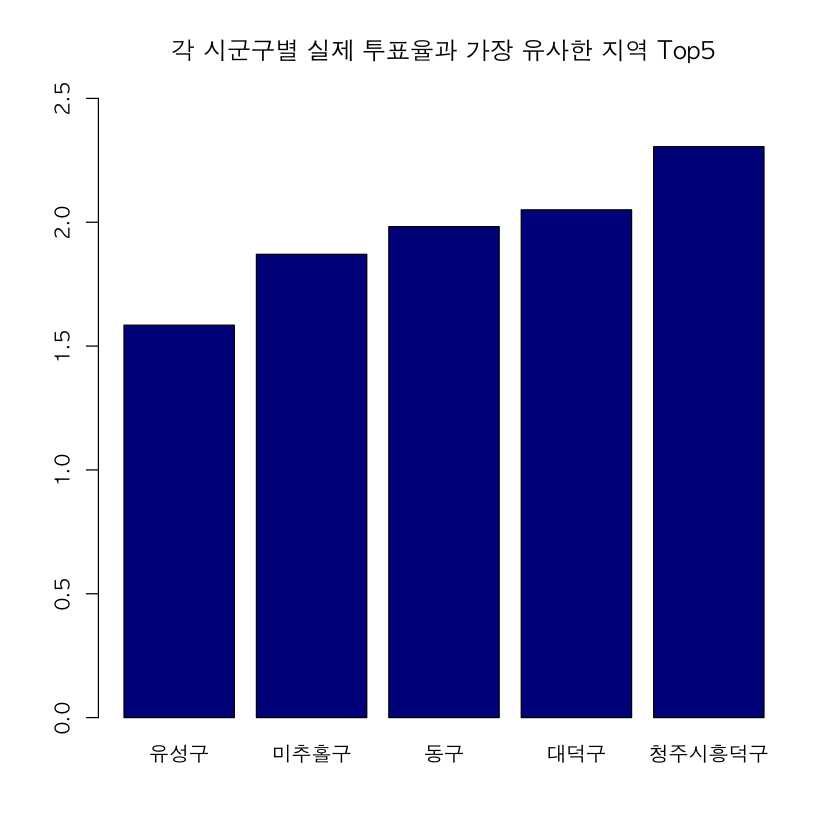

In [335]:
options(warn = -1)
par(family = "AppleGothic")
barplot(dataset,

        ylim=c(0,2.5),
        col="darkblue",
        main="각 시군구별 실제 투표율과 가장 유사한 지역 Top5",
        names=a$시군구
)